Goal : explore the lyrics data, and make a simple model to predict the genras based on the lyrics

# 1. Import and path configuration part

In [12]:
import sys, os
sys.path.append(os.getcwd())
datapath = "../data/msdi/"
os.chdir(datapath)
!ls

deep_features  labels.csv  metadata_msdi.csv  msdi_mapping.csv
img	       lyrics	   mfcc		      README.md


In [85]:
import numpy as np
import matplotlib as plt

from sam_utils import *
from models import *
from utils import *

In [16]:
msdi = get_msdi_dataframe("")

# 2. Data exploration

In [28]:
print(len(msdi), len(os.listdir("lyrics"))) # we dont have the lyrics for each data (can be problematic for the multimodal part)

30712 14750


In [45]:
# load all the lyrics data
data = {}
for elem in os.listdir("lyrics"):
    data[elem[:-5]] = pd.read_json("lyrics/" + elem, typ="series")

min = 2 max= 1739 mean= 236.44020338983051


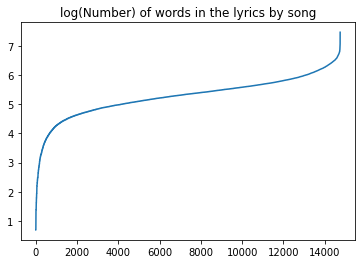

In [76]:
# Total wordcount of the words that appear in each song

total_wordcount = []
for k in data.keys():
    total_wordcount.append(data[k].sum())
    
total_wordcount.sort()

plt.plot(np.log(total_wordcount))
plt.title("log(Number) of words in the lyrics by song")

print("min =",min(total_wordcount),"max=", max(total_wordcount), "mean=", np.mean(total_wordcount))

# there is a lot of variance in the number of words with have in the lyrics
# do we need to filter out some lyrics ?

min = 1 max= 428 mean= 86.86447457627119


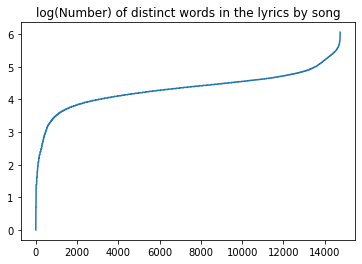

In [80]:
# Number of distinct words in each song

word_number = []

for k in data.keys():
    word_number.append(len(data[k]))
    
word_number.sort()

plt.plot(np.log(word_number))
plt.title("log(Number) of distinct words in the lyrics by song")

print("min =",min(word_number),"max=", max(word_number), "mean=", np.mean(word_number))

# 3. Training a classifier

In [86]:
rnn_model = lyrics_RNN()
rnn_model.to(device)

NameError: name 'lyrics_RNN' is not defined

## 1. Data formatting

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

max_len = 250
batch_size = 64
embed_size = 128
hidden_size = 128
device = torch.device('cuda') 

In [ ]:
X = np.zeros((len(lyrics), max_len*2)) 

for i in range(len(lyrics)):
    X[i,:max_len] = seen_words[i] 
    X[i,max_len:] = words_frequency[i]

X = torch.from_numpy(X)
Y = torch.LongTensor(labels_int)

print(X.size())
print(Y.size())

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

print(X_train.size(),X_test.size())
print(Y_train.size(),Y_test.size())

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
train_set = TensorDataset(X_train, Y_train)
test_set = TensorDataset(X_test, Y_test)

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=False) #je les ai déjà shuffle avec train_test_split
test_loader = DataLoader(test_set, batch_size=batch_size)